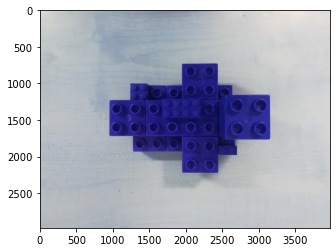

In [31]:

import matplotlib.pyplot as plt
import  numpy as np
import cv2
import os

DATADIR = "F:/datasets/Lego_models_error_detection"
CATEGORIES = ["1", "2", "3"]

for category in CATEGORIES:#test megjelenik-e a kép, jó-e az útvonal
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [32]:
print(img_array.shape)

(2976, 3968, 3)


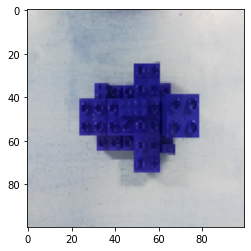

In [33]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [34]:
traning_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                traning_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [1]:
training_data = traning_data
print(len(training_data))

NameError: name 'traning_data' is not defined

In [103]:
import random

random.shuffle(training_data)

In [104]:
X = []
y = []

In [105]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [106]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()